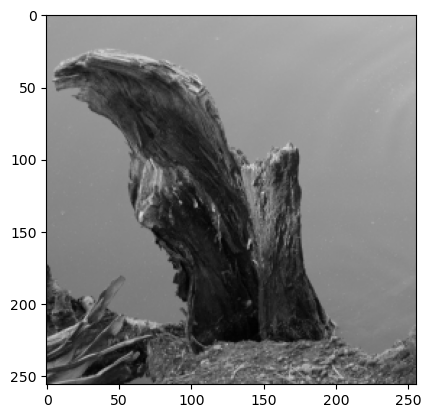

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Dataset shape: (256, 256, 3)
Dataset: [[[ 296447833  296447833  296447833]
  [ 296447833  296447833  296447833]
  [1210699526 1210699526 1210699526]
  ...
  [1671184816 1671184816 1671184816]
  [ 756933123  756933123  756933123]
  [2493339452 2493339452 2493339452]]

 [[1210699526 1210699526 1210699526]
  [ 296447833  296447833  296447833]
  [1210699526 1210699526 1210699526]
  ...
  [ 756933123  756933123  756933123]
  [ 756933123  756933123  756933123]
  [1671184816 1671184816 1671184816]]

 [[1210699526 1210699526 1210699526]
  [2032854162 2032854162 2032854162]
  [ 296447833  296447833  296447833]
  ...
  [ 756933123  756933123  756933123]
  [ 756933123  756933123  756933123]
  [2493339452 2493339452 2493339452]]

 ...

 [[ 828873522  828873522  828873522]
  [ 736776465  736776465  736776465]
  [1651028158 1651028158 1651028158]
  ...
  [ 559301234  559301234  559301234]
  [ 559301235  559301235  559301235]
  [2479901680 2479901680 2479901680]]

 [[3295337430 3295337430 3295337430]

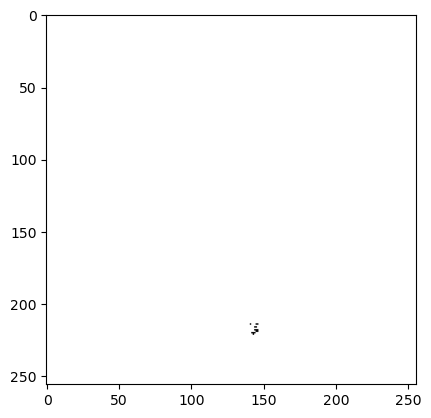

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def image_to_dataset(image_path):
    # Read the image
    image = cv2.imread(image_path)
#     if len(image.shape) == 3:
#         image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    p = 3472812659
    inverse_of_2 = pow(2, -1, p)

    # Multiply each pixel value by the inverse of 2 modulo p
    image_array = (image * inverse_of_2) % p
    return image_array

# Example usage
# image_path = 'colourImg.jpg'
image_path = 'bw.png'
image = cv2.imread(image_path)
plt.imshow(image,cmap='gray')       
plt.show()

dataset = image_to_dataset(image_path)
print("Dataset shape:", dataset.shape)
print("Dataset:", dataset)
plt.imshow(dataset)       
plt.show()
#print(dataset[1])

In [2]:
# Eliptic curve parameters
a=71264358
b=2672718120
p=3472812659


# Base point co-ordinates
gx=1090012128
gy=2391085776
G=(gx,gy)

In [3]:
if((4*(a**3)+27*(b**2))%p == 0):
  print("Curve is singular")
else:
  print("Curve is non-singular")

Curve is non-singular


In [4]:
if(p%4==3):
  print("We can find the points")
else:
  print("We can't find the points")

We can find the points


In [5]:
import numpy as np
O=(np.inf,np.inf)

In [6]:
def addPoint(P,Q,p):
    x1,y1 =P
    x2,y2 =Q
    x1=int(x1)
    x2=int(x2)
    y1=int(y1)
    y2=int(y2)
    if( x1==x2 and y1==y2):
        b= (3*(x1**2) + a) * pow(2*y1,-1,p)
    else:
        b=(y2-y1)*pow(x2-x1,-1,p)

    x3=((b*b)-x1-x2)%p
    y3=((b*(x1-x3))-y1)%p
    return x3,y3


In [7]:
cipherText=[]
def eccEncrypt(P):
    print(P)
    publicKey=3
    e1=G
    a=e1
    for i in range(publicKey-1):
        aux=addPoint(a,e1,p)
        a=aux
    privateKey= aux
    r=5
    a=e1
    e2=privateKey
    b=e2
    for i in range(r-1):
        aux2=addPoint(a,e1,p)
        a=aux2
        aux1=addPoint(b,e2,p)
        b=aux1
    c1=aux2
    c2=addPoint(aux1,P,p)
    cipherText.append((c1,c2))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(256, 256, 3)
(256, 256, 3)


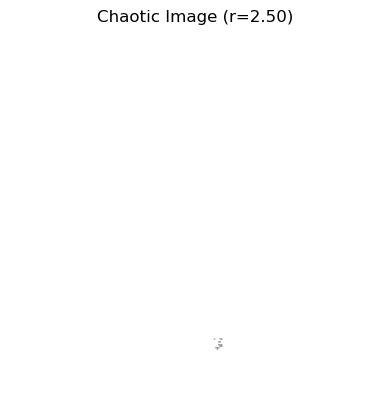

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def logistic_map(x, r):
    return r * x * (1 - x)

def generate_chaotic_sequence(seed, r, num_pixels):
    sequence = []
    x = seed
    for _ in range(num_pixels):
        x = logistic_map(x, r)
        sequence.append(x)
    return np.array(sequence)

def chaoticmapping():
    # Parameters
    seed = 0.5  # Initial value (between 0 and 1)
    r = 2.5     # Chaotic parameter (experiment with different values)
    num_pixels = 256 * 256 * 3

    # Generate chaotic sequence
    chaotic_sequence = generate_chaotic_sequence(seed, r, num_pixels)

#     print(dataset)
    print(dataset.shape)
    # Ensure the chaotic sequence has the same shape as the image array
    chaotic_sequence = chaotic_sequence.reshape(dataset.shape)
    print(chaotic_sequence.shape)
    # XOR each pixel value with the corresponding chaotic number
    chaotic_image = np.bitwise_xor(dataset, (chaotic_sequence * 255).astype(np.uint8))
    # Display the chaotic image
    plt.imshow(chaotic_image)
    plt.axis('off')
    plt.title(f"Chaotic Image (r={r:.2f})")
    plt.show()
    return chaotic_image

chaotic_image=chaoticmapping()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


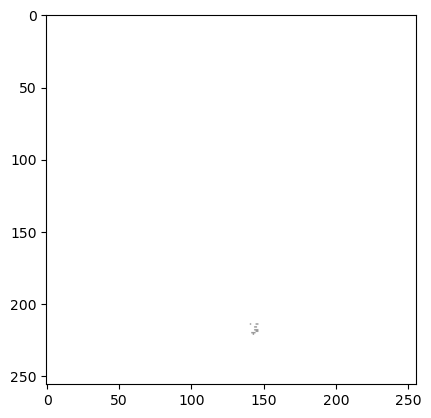

[[[ 296447942  296447948  296447939]
  [ 296447937  296447936  296447937]
  [1210699679 1210699678 1210699679]
  ...
  [1671184681 1671184681 1671184681]
  [ 756933274  756933274  756933274]
  [2493339557 2493339557 2493339557]]

 [[1210699679 1210699679 1210699679]
  [ 296447936  296447936  296447936]
  [1210699679 1210699679 1210699679]
  ...
  [ 756933274  756933274  756933274]
  [ 756933274  756933274  756933274]
  [1671184681 1671184681 1671184681]]

 [[1210699679 1210699679 1210699679]
  [2032854027 2032854027 2032854027]
  [ 296447936  296447936  296447936]
  ...
  [ 756933274  756933274  756933274]
  [ 756933274  756933274  756933274]
  [2493339557 2493339557 2493339557]]

 ...

 [[ 828873643  828873643  828873643]
  [ 736776584  736776584  736776584]
  [1651028007 1651028007 1651028007]
  ...
  [ 559301355  559301355  559301355]
  [ 559301354  559301354  559301354]
  [2479901545 2479901545 2479901545]]

 [[3295337295 3295337295 3295337295]
  [3387434337 3387434337 3387434337]


(1118602365, 204350894)
(1118602365, 2855008902)
(204350894, 1118602365)
(2855008902, 2855008902)
(2855008902, 2855008902)
(2855008902, 296447937)
(2855008902, 2855008902)
(296447937, 2855008902)
(296447937, 1210699679)
(296447936, 2032854027)
(296447936, 296447936)
(296447936, 296447936)
(296447936, 2032854027)
(296447937, 296447936)
(1210699679, 1210699679)
(1210699679, 388544995)
(296447936, 2947106009)
(296447936, 388544995)
(2947106009, 2947106009)
(2947106009, 2124951085)
(388544995, 1210699679)
(388544995, 388544995)
(2947106009, 2947106009)
(388544995, 388544995)
(296447936, 2947106009)
(296447936, 1210699679)
(1210699679, 296447936)
(296447936, 1210699679)
(296447936, 1210699679)
(1210699679, 1210699679)
(296447936, 296447936)
(296447936, 1210699679)
(2947106009, 1210699679)
(1210699679, 296447936)
(388544995, 2124951085)
(388544995, 2947106009)
(388544995, 2124951085)
(388544995, 388544994)
(388544994, 1302796721)
(388544994, 1302796721)
(1302796721, 1302796721)
(3039203067, 

(20156522, 20156522)
(934408249, 934408249)
(934408249, 112253836)
(934408249, 934408249)
(934408249, 2670814531)
(934408249, 934408249)
(934408249, 112253836)
(112253836, 2670814531)
(934408249, 20156522)
(2670814531, 2670814531)
(934408249, 934408249)
(2670814531, 2670814531)
(934408249, 2670814531)
(112253836, 2670814531)
(112253836, 112253836)
(934408249, 2670814531)
(112253836, 112253836)
(112253836, 112253836)
(1848660183, 112253836)
(1026505307, 2670814531)
(2670814531, 112253836)
(204350894, 1848660183)
(2670814531, 2670814531)
(2670814531, 2670814531)
(2670814531, 2670814531)
(2670814531, 2670814531)
(1848660183, 2670814531)
(934408249, 2670814531)
(1848660183, 2670814531)
(2670814531, 1848660183)
(1940757225, 2762911588)
(112253836, 1848660183)
(112253836, 112253836)
(112253836, 112253836)
(1572368753, 1572368753)
(1572368753, 1572368753)
(1572368753, 1572368753)
(658117282, 3308775355)
(3308775355, 1572368753)
(658117282, 658117282)
(1572368753, 3308775355)
(3308775355, 2486

(92097210, 184194268)
(2926949335, 1098445675)
(1828503493, 92097211)
(92097211, 2742755219)
(92097210, 914251575)
(914251575, 2650657905)
(152, 152)
(914251575, 2104794458)
(920970701, 1835222427)
(6718782, 3111143179)
(368388112, 2104794458)
(460485169, 736776585)
(2565279988, 2933667949)
(283010197, 2473182931)
(3203240237, 368388113)
(2104794458, 2473182931)
(3111143179, 1466834147)
(552582228, 6718782)
(3111143179, 644679287)
(2196891517, 460485169)
(2104794458, 1835222427)
(1466834147, 644679285)
(2926949335, 2288988831)
(828873643, 1558930949)
(2565279988, 552582228)
(644679287, 6718782)
(2288988831, 2196891517)
(2381085873, 3203240237)
(3387434337, 467204296)
(559301355, 3025765262)
(559301355, 552582228)
(1282640047, 98815824)
(1473553080, 3302056420)
(3025765262, 375107254)
(473922927, 2026135156)
(2118232471, 1388174653)
(3124580935, 566020225)
(566020225, 1480271711)
(3216678297, 658117282)
(3216678297, 1480271711)
(1480271711, 1480271711)
(3216678297, 3216678297)
(14802717

In [9]:
image= chaotic_image
chimg= image
plt.imshow(image)
plt.show()
print(image)
pixels=[]
for i in range(256):
    for j in range(256):
        #eccEncrypt((image[i][0],image[i][1]))
#         print(image[i][j][0],image[i][j][1],image[i][j][2])
        
        val=(0.299*image[i][j][0]) + (0.587*image[i][j][1]) + (0.114*image[i][j][2])
        #print(val)
        pixels.append(int(val))

for i in range(0,len(pixels),2):
    eccEncrypt((int(pixels[i]),int(pixels[i+1])))
# print(cipherText)
print(len(pixels))
# print(pixels)
print(291373667/0.299)

In [10]:
img=[]
row=[]
alpha=[]
for i in range(len(cipherText)):
#     for j in range(len(cipherText[i])):
    val1=cipherText[i][1][0]
    val2=cipherText[i][1][1]
    integer_value = val1

    # Extract RGB components using byte masking and shifting
    alp= (integer_value >> 24) & 0xFF
    red = (integer_value >> 16) & 0xFF  # Extract red component (bits 16-23)
    green = (integer_value >> 8) & 0xFF  # Extract green component (bits 8-15)
    blue = integer_value & 0xFF  # Extract blue component (bits 0-7)
    pix1=[red,green,blue]
    alpha.append(alp)
    pix1=np.array(pix1)
    integer_value = val2

    # Extract RGB components using byte masking and shifting
    alp= (integer_value >> 24) & 0xFF
    red = (integer_value >> 16) & 0xFF  # Extract red component (bits 16-23)
    green = (integer_value >> 8) & 0xFF  # Extract green component (bits 8-15)
    blue = integer_value & 0xFF  # Extract blue component (bits 0-7)
    alpha.append(alp)
    pix2=[red,green,blue]
    pix2=np.array(pix2)
    
    if(len(row)!=256):
        row.append(pix1)
        row.append(pix2)
    else:
        row=np.array(row)
        img.append(row)
        row=[]
        row.append(pix1)
        row.append(pix2)
        
print(len(img))
print(len(img[0]))
print(len(img[0][0]))
# print(alpha)

255
256
3


In [11]:
from PIL import Image
import numpy as np

# Your code to create the 'img' list of pixel values

# Convert the 'img' list to a numpy array
img_array = np.array(img, dtype=np.uint8)

# Create an image from the numpy array
image = Image.fromarray(img_array)

# Save or display the image
image.save("output_image.png")  # Save the image to a file
image.show()  # Display the image


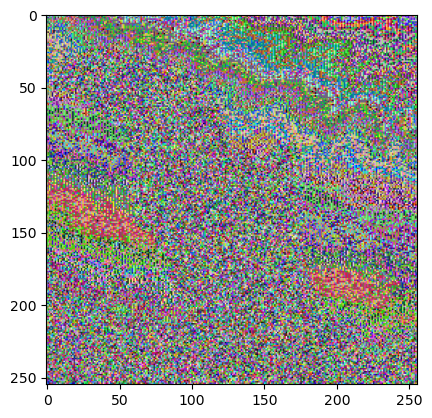

In [12]:
image_path = 'output_image.png'
image = cv2.imread(image_path)

# if len(image.shape) == 3:
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)       
plt.show()

In [28]:
from math import log10, sqrt
import cv2
import numpy as np

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        # MSE is zero means no noise is present in the signal.
        # Therefore PSNR has no importance.
        return 100

    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
    original = cv2.imread("bw.png")
    compressed = cv2.imread("output_image.png", 1)

    # Resize compressed image to match original image's dimensions
    compressed = cv2.resize(compressed, (original.shape[1], original.shape[0]))

    value = PSNR(original, compressed)
    print(f"PSNR value is {value} dB")

main()


PSNR value is 27.891061687433442 dB


In [36]:
import cv2
import numpy as np


# Load the encrypted images (replace 'encrypted_image_path' with your actual image path)
image = cv2.imread('bw.png')
image=cv2.resize(image,(256,255))
encrypted_image = cv2.imread("output_image.png")

# Convert the images to grayscale
# image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# encrypted_image_gray = cv2.cvtColor(encrypted_image, cv2.COLOR_BGR2GRAY)

# Calculate the Mean Square Error (MSE)
mse = np.mean((image - encrypted_image) ** 2)

print(f"Mean Square Error: {mse}")

Mean Square Error: 105.48719362745098


In [13]:
packed=[]
# print(image) # RGB components
for i in range(255):
    for j in range(256):
        a=alpha[j]
        R = image[i][j][0]
        G = image[i][j][1]
        B = image[i][j][2]
#         print(a,R,G,B)

        # Pack RGB components into a single integer value
        packed_value = (a << 24) |(B << 16) | (G << 8) | R
        packed.append(packed_value)

# print(packed)
# integer_value = packed_value

#     # Extract RGB components using byte masking and shifting
# alp= (integer_value >> 24) & 0xFF
# red = (integer_value >> 16) & 0xFF  # Extract red component (bits 16-23)
# green = (integer_value >> 8) & 0xFF  # Extract green component (bits 8-15)
# blue = integer_value & 0xFF  # Extract blue component (bits 0-7)
# pix1=[blue,green,red]
# print(alp)
# print(pix1)

In [14]:
decodedC2=[]
for i in range(0,len(packed),2):
    decodedC2.append((packed[i],packed[i+1]))
# print(decodedC2)


In [15]:
plainText=[]
p=3472812659
def eccDecrypt():
    publicKey=3
    for i in range(len(decodedC2)):
#     print(i)
        c1=cipherText[i][0]
        c2=decodedC2[i]
        print(c1,c2)
        a=c1
        for i in range(publicKey-1):
            aux=addPoint(a,c1,p)
            a=aux
        dc1= (-aux[1])%p
        print(aux)
        print(dc1)
        dc1=(aux[0],dc1)
        print(dc1)
        P=addPoint(c2,dc1,p)
        plainText.append(P)


In [16]:
eccDecrypt()
# print(plainText)
# 488047052, 1798993526,

(656391112, 2260244958) (1938283287, 944528774)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (2922374438, 2430287407)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (3140346459, 2370450171)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (2922374438, 2430287407)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (3114440138, 2067355859)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (2922374438, 2430287407)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (3156602959, 909450125)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (3156602959, 909450125)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (3264491614, 3069534880)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (217718

(656391112, 2260244958) (3004214588, 3278449058)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (3271379774, 3058920383)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (271499736, 568026477)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (275127132, 570047223)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (284967977, 560988438)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (394320973, 578518778)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (394320973, 578518778)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (1979534142, 3159583679)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (3002944318, 391343039)
(106492642, 1414295006)
2058517653
(106492642, 2058517653)
(656391112, 2260244958) (1970265780, 31

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
obpix=[]
for i in plainText:
    obpix.append(i[0])
    obpix.append(i[1])
print(obpix)

[453775865, 2331309982, 2100800769, 945222788, 820322188, 203392621, 2100800769, 945222788, 1844850586, 1135243009, 2100800769, 945222788, 1649190837, 3317944179, 1649190837, 3317944179, 881805699, 1045630982, 1533144919, 3148112801, 881805699, 1045630982, 2500074917, 140457676, 881805699, 1045630982, 405241074, 1256029205, 405241074, 1256029205, 405241074, 1256029205, 2974862599, 2428498372, 2974862599, 2428498372, 2547047824, 1989744559, 2331679367, 1097523535, 2547047824, 1989744559, 757194969, 9655367, 387057637, 217407956, 947319970, 1261301761, 916441607, 2935093335, 387057637, 217407956, 387057637, 217407956, 3348423453, 465369074, 2334991650, 1595120747, 2747395340, 1482817019, 2334991650, 1595120747, 1792317432, 2290447101, 2334991650, 1595120747, 1940493880, 2273853947, 1412920882, 1567244141, 387057637, 217407956, 2204482657, 2930969097, 3348423453, 465369074, 2747395340, 1482817019, 2493460009, 1647783542, 1792317432, 2290447101, 2334991650, 1595120747, 1835466246, 31028576

In [18]:
img=[]
row=[]
for i in pixels:
    
    integer_value = i
        # Extract RGB components using byte masking and shifting
    alp= (integer_value >> 24) & 0xFF
    red = (integer_value >> 16) & 0xFF  # Extract red component (bits 16-23)
    green = (integer_value >> 8) & 0xFF  # Extract green component (bits 8-15)
    blue = integer_value & 0xFF  # Extract blue component (bits 0-7)
    pix1=[blue,green,red]
    
    pix1=np.array(pix1)
    
    if(len(row)!=256):
        row.append(pix1)
        
    else:
        row=np.array(row)
        img.append(row)
        row=[]
        row.append(pix1)
print(len(img))
print(len(img[0]))
print(len(img[0][0]))

255
256
3


In [19]:
from PIL import Image
import numpy as np

# Your code to create the 'img' list of pixel values

# Convert the 'img' list to a numpy array
img_array = np.array(chaotic_image, dtype=np.uint8)

# Create an image from the numpy array
image = Image.fromarray(img_array)

# chimg=np.array(chimg, dtype=np.uint8)
# image=Image.fromarray(chimg)
# Save or display the image
image.save("output1.png")  # Save the image to a file
image.show()  # Display the image


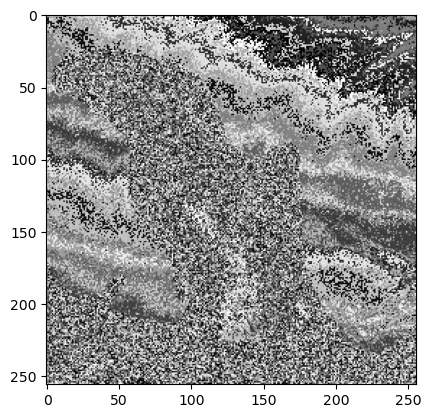

In [20]:
image_path = 'output1.png'
image = cv2.imread(image_path)

# if len(image.shape) == 3:
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)       
plt.show()

In [21]:
# val = (105534961 & 0xFF) |((190912894  & 0xFF)<< 8) | ((1296077592 & 0xFFFF) <<16)
# (value1 & 0xFF) | ((value2 & 0xFF) << 8) | ((value3 & 0xFFFF) << 16)
# val=(0.299*105534961) + (0.587*190912894) + (0.114*1296077592)
print(int(val))
integer_value = obpix[0]

    # Extract RGB components using byte masking and shifting
# alp= (integer_value >> 24) & 0xFF
red = (integer_value >> 16) & 0xFF  # Extract red component (bits 16-23)
green = (integer_value >> 8) & 0xFF  # Extract green component (bits 8-15)
blue = integer_value & 0xFF  # Extract blue component (bits 0-7)
pix1=[blue,green,red]
# print(alp)
print(pix1)

2571998859
[249, 17, 12]


In [22]:

a=alpha[0]
R = 193
G = 187
B = 175
print(a,R,G,B)

        # Pack RGB components into a single integer value
packed_value = (a << 24) |(B << 16) | (G << 8) | R
        

print(packed_value)
integer_value = 2679094209

    # Extract RGB components using byte masking and shifting
alp= (integer_value >> 24) & 0xFF
red = (integer_value >> 16) & 0xFF  # Extract red component (bits 16-23)
green = (integer_value >> 8) & 0xFF  # Extract green component (bits 8-15)
blue = integer_value & 0xFF  # Extract blue component (bits 0-7)
pix1=[blue,green,red]
print(alp)
print(pix1)

115 193 187 175
1940896705
159
[193, 187, 175]


In [23]:
def addPoint(P,Q,p):
    x1,y1 =P
    x2,y2 =Q
    x1=int(x1)
    x2=int(x2)
    y1=int(y1)
    y2=int(y2)
    if( x1==x2 and y1==y2):
        b= (3*x1*x2 + a) * pow(2*y1,-1,p)
    else:
        b=(y2-y1)*pow(x2-x1,-1,p)

    x3=(b*b-x1-x2)%p
    y3=(b*(x1-x3)-y1)%p
    return x3,y3
# x,y=addPoint((656391112, 2260244958),(656391112, 2260244958),3472812659)
# print(x,y)

In [24]:
# x,y=addPoint((1184157512,3118380422),(656391112, 2260244958),3472812659)
# print(x,y)

In [25]:
# y=-y+p
# print(y)

In [26]:
# x,y=addPoint((2679094209, 2211499344),(2631785526, 2056796651),3472812659)
# print(x,y)

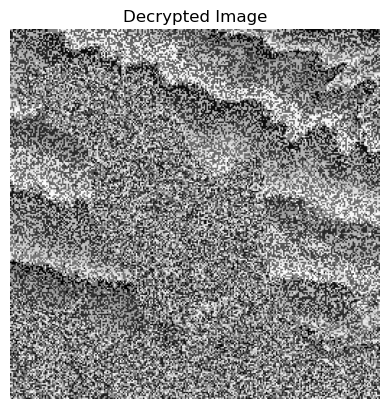

In [27]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


def logistic_map(x, r):
    return r * x * (1 - x)

def generate_chaotic_sequence(seed, r, num_pixels):
    sequence = []
    x = seed
    for _ in range(num_pixels):
        x = logistic_map(x, r)
        sequence.append(x)
    return np.array(sequence)

def reverse_encryption(chaotic_image, chaotic_sequence, p):
    # chaotic_sequence_reshaped = chaotic_sequence.reshape(chaotic_image.shape[:2])
    decrypted_array = np.bitwise_xor(chaotic_image, (chaotic_sequence* 255).astype(np.uint8))

    decrypted_array = (decrypted_array * 2) % p

    decrypted_image = Image.fromarray(decrypted_array.astype(np.uint8))
    
    return decrypted_image

def main():
    seed = 0.5  
    r = 2.5    
    num_pixels = 256*256*3
    p = 3472812659
    image_path = 'output1.png'
    chaotic_image=cv2.imread(image_path)
    chaotic_sequence = generate_chaotic_sequence(seed, r, num_pixels)
    
    chaotic_sequence = chaotic_sequence.reshape(dataset.shape)
    
    decrypted_image = reverse_encryption(chaotic_image, chaotic_sequence, p)
    decrypted_image.save("decrypted_image.png") 
    # cv2.imwrite("decrypted_image.png", decrypted_image)

    plt.imshow(decrypted_image)
    plt.axis('off')
    plt.title("Decrypted Image")
    plt.show()

if __name__ == "__main__":
    main()


In [45]:
from math import log10, sqrt
import cv2
import numpy as np

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        # MSE is zero means no noise is present in the signal.
        # Therefore PSNR has no importance.
        return 100

    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

def main():
    original = cv2.imread("bw.png")
    compressed = cv2.imread("decrypted_image.png", 1)

    # Resize compressed image to match original image's dimensions
    compressed = cv2.resize(compressed, (original.shape[1], original.shape[0]))

    value = PSNR(original, compressed)
    print(f"PSNR value is {value} dB")

main()


PSNR value is 27.913797102749783 dB


In [46]:
import cv2
import numpy as np


# Load the encrypted images (replace 'encrypted_image_path' with your actual image path)
image = cv2.imread('bw.png')
image=cv2.resize(image,(256,256))
encrypted_image = cv2.imread("decrypted_image.png")

# Convert the images to grayscale
# image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# encrypted_image_gray = cv2.cvtColor(encrypted_image, cv2.COLOR_BGR2GRAY)

# Calculate the Mean Square Error (MSE)
mse = np.mean((image - encrypted_image) ** 2)

print(f"Mean Square Error: {mse}")

Mean Square Error: 105.12370300292969
